In [1]:
# These two lines of code make your notebook aware of changes in your utils.py file without needing to restart the session each time
%load_ext autoreload
%autoreload 2

In [8]:
import librosa as li
import torch
torch.set_grad_enabled(False)
from mix_utils import normalize
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import pickle
from tqdm import tqdm

AUDIO_DIR = 'audio2/'
MODEL_PATH = 'models/musicnet.ts'
FEATURES_FILE_PATH = 'data/features_16s.csv'

# Load the model
model = torch.jit.load(MODEL_PATH).eval() 

In [49]:
import matplotlib.font_manager

fonts = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

print(fonts)

['/usr/share/fonts/truetype/ubuntu/Ubuntu-RI.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed-Italic.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-LI.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans-Oblique.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-Th.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuMathTeXGyre.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerifCondensed.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed-Oblique.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansMono-BoldOblique.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf', '/usr/share/fonts/truetype/dejavu/DejaVuSansCondensed.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf', '/usr/share/fo

330


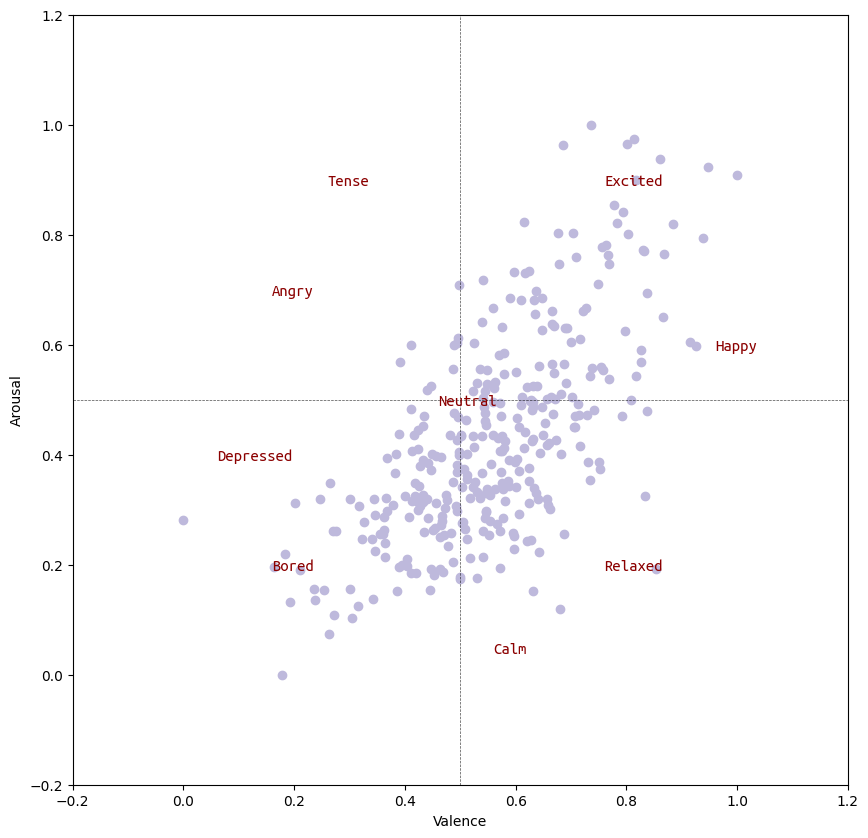

In [71]:
# Read features file path
df = pd.read_csv(FEATURES_FILE_PATH, header=None)

# Extract the audiofile names
names = df.iloc[:, 0].to_numpy()
arousal = df.iloc[:, 3].to_numpy()
valence = df.iloc[:, 4].to_numpy()

# Normalize the arousal and valence values and combine them into a single array
arousal, valence = normalize(arousal, valence)
data = np.column_stack((arousal, valence))
print(len(names))

# Plot 2D scatter plot, with valence on the x-axis and arousal on the y-axis

x_adjust = -0.04
y_adjust = -0.01

from matplotlib import font_manager

font_path = '/usr/share/fonts/truetype/ubuntu/UbuntuMono-R.ttf'
font_prop = font_manager.FontProperties(fname=font_path, size=12)

plt.figure(figsize=(10, 10))
# RGB values for violet
violet_rgb = np.array([190, 185, 220])
violet_rgb = violet_rgb/255
plt.scatter(valence, arousal, alpha=1.0, color=violet_rgb)

plt.text(1 + x_adjust, 0.6 + y_adjust, 'Happy', fontproperties=font_prop, color='darkred')
plt.text(0.8 + x_adjust, 0.9 + y_adjust, 'Excited', fontproperties=font_prop, color='darkred')
plt.text(0.2 + x_adjust, 0.7 + y_adjust, 'Angry', fontproperties=font_prop, color='darkred')
plt.text(0.3 + x_adjust, 0.9 + y_adjust, 'Tense', fontproperties=font_prop, color='darkred')
plt.text(0.1 + x_adjust, 0.4 + y_adjust, 'Depressed', fontproperties=font_prop, color='darkred')
plt.text(0.6 + x_adjust, 0.05 + y_adjust, 'Calm', fontproperties=font_prop, color='darkred')
plt.text(0.8 + x_adjust, 0.2 + y_adjust, 'Relaxed', fontproperties=font_prop, color='darkred')
plt.text(0.2 + x_adjust, 0.2 + y_adjust, 'Bored', fontproperties=font_prop, color='darkred')
plt.text(0.5 + x_adjust, 0.5 + y_adjust, 'Neutral', fontproperties=font_prop, color='darkred')

plt.axhline(0.5, color='black', linewidth=0.5, linestyle='--', alpha=0.7)
plt.axvline(0.5, color='black', linewidth=0.5, linestyle='--', alpha=0.7)

plt.xlabel('Valence')
plt.ylabel('Arousal')
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.show()


In [10]:
encodings = []
for audiofile in tqdm(names):
    x, sr = li.load(audiofile, sr = 44100)
    # Cut audio to first 16 seconds
    x = x[:16 * sr]
    x_tensor = torch.from_numpy(x).reshape(1, 1, -1)
    x_latent = model.encode(x_tensor)
    encodings.append(x_latent)
print(len(encodings))

100%|██████████| 330/330 [03:18<00:00,  1.66it/s]

330


In [11]:
# Save the encodings to a pickle file
with open('encodings.pkl', 'wb') as f:
    pickle.dump(encodings, f)